# **Adaptive Boosting (AdaBoost)**

Noah Rubin

Self Study - July 2021

---

### Main Ideas:

* AdaBoost is a meta-algorithm, meaning it ["learns from the output of learning algorithms and make(s) a prediction given predictions made by other models."](https://machinelearningmastery.com/meta-learning-in-machine-learning/)
* The idea of AdaBoost is "to fit a sequence of weak learners (i.e., models that are only slightly better than random guessing, such as small decision trees) on repeatedly modified versions of the data." - [Sklearn Documentation](https://scikit-learn.org/stable/modules/ensemble.html#adaboost)
* These tiny decision trees are sometimes called [decision stumps](https://en.wikipedia.org/wiki/Decision_stump#:~:text=A%20decision%20stump%20is%20a,just%20a%20single%20input%20feature.)
* The modifications of the data at each boosting iteration involves applying weights $w_i$ for $i = 1...N$ to each of the observations in the training set
* The learning process starts by setting each $w_i = \frac{1}{N}$ for $i = 1...N$  to represent the idea that each sample initially receives the same weighting when fitting a weak learner on the original training dataset
* These weights of course change with each iteration of the algorithm, where each sample's weight changes before the algorithm is reapplied to the data with modified weights. Observations with incorrect predictions have their weights increased while weights are decreased for samples predicted that output correct predictions
* So as the number of iterations increases, samples that are often misclassified (difficult to predict) receive higher and higher weighting
* This ensures that each subsequent weak learner concentrates more on samples predicted incorrectly by the previous decision stump in the sequence
* Ultimately, with AdaBoost, while each 'weak learner' only does an ok job at classifying the samples, the final model with all the all the weak learners combined will converge to an overall strong learner
* This differs from a random forest classifier since all individual learners in a random forest are built independently (and are not built through considering the mistakes from the previously built tree).

---

### Mathematical Details:

Suppose we have a training dataset $\{\vec{x}_i, y_i\}_{i=1}^N$ with $N$ observations in which $\vec{x}_i = (x_{i1}, x_{i2}, ..., x_{ip})$ is a $(1 \times p)$ row vector and $y_i \in \{-1, 1\}$ is a scalar. To keep things less messy, for notation purposes $x_i = \vec{x}_i.$ Each feature vector $x_i$ has an associated $y_i$, and as well as this, we have a set of $L$ weak learners (usually decision stumps) $\{k_1, k_2, ..., k_L\}$ in which an individual classifer takes in a feature vector $x_i$ and outputs either a value of -1 or 1 such that $k_j(x_i) \in \{-1, 1\}$ for each observation $i.$ After $(m-1)$ boosting iterations, the AdaBoost classifier is a weighted sum of each of our weak leaners such that:

$$C_{(m-1)}(x_i) = a_{1}k_{1}(x_i) + ... + a_{m-1}k_{m-1}(x_i)$$

If we were to add tree number $m$ (i.e. perform our $m^{th}$ boosting iteration), we then have another decision stump $k_m$ and another weight $a_m$ in which we then obtain:

$$C_{m}(x_i) = C_{(m-1)}(x_i) + a_{m}k_m(x_i)$$

It now becoms a case of seeing which weight $k_m$ is the most suitable new decision stump and what weight $a_m$ this should stump should have. To do this, we define a 'total error' function $E$ of $C_m$ as ["the sum of its exponential loss on each data point"](https://en.wikipedia.org/wiki/AdaBoost#Derivation), such that:

$$E = \sum_{i=1}^N e^{-y_iC_m(x_i)}$$

Since $C_{m}(x_i) = C_{(m-1)}(x_i) + a_{m}k_m(x_i)$:

$$E = \sum_{i=1}^N e^{-y_i[C_{(m-1)}(x_i) + a_{m}k_m(x_i)]}$$

By exponent laws that $e^{a+b} = e^a e^b$, we obtain:

$$E = \sum_{i=1}^N e^{-y_iC_{(m-1)}(x_i)} e^{-y_{i}a_{m}k_m(x_i)}$$

Introducing $w_i^{[m]} = e^{-y_i C_{(m-1)}(x_i)}$ for $m > 1$ and $w_i^{[m]} = 1$ for $m = 1$, our total error $E$ becomes: 

$$E = \sum_{i=1}^N w_i^{[m]} e^{-y_i a_m k_m(x_i)}$$

Since $w_i^{[m]} = 1$ for $m = 1$, if we are in the first iteration of AdaBoost, the loss function for the first tree is given as:

$$E = \sum_{i=1}^N e^{-y_i a_1 k_1(x_i)}$$

Ultimately, for correct classifications made by $k_m$, we know that $k_{m}(x_i) = y_i$, hence $y_i \cdot k_{m}(x_i) = 1$ since $y_i \in \{-1, 1\}$. For incorrect classifications where $k_{m}(x_i) \neq y_i$, we know that $y_i \cdot k_{m}(x_i) = -1.$ The $a_m$ term will scale this 1 or -1 value appropriately but what matters is that $E$ is larger for incorrectly classified samples and lower for correctly classified observartions. 

---

To create an initial decision stump, we search over all of our predictor space (i.e. the set of possible values for $X_1, X_2, ... X_k$, asuuming a total of $k$ independent variables) to find the predictor $X_j; j \in [1, k]$ and cutoff point $X_j = s$ such that by placing values where $X_j < s$ in one region and placing values $X_j \geq s$ in another region allows us to do the best job possible in classifying the samples. This is ultimately quantified through measures such as [Gini Impurity](https://towardsdatascience.com/gini-impurity-measure-dbd3878ead33). Once we have created this stump, our current model is of the form 

$$C_{1}(x_i) = C_{0}(x_i) + a_{1}k_1(x_i) = 0 + a_{1}k_1(x_i) = a_{1}k_1(x_i)$$

This then implies that:

$$w_i^{[2]} = e^{-y_i a_1 k_1(x_i)} = e^{-y_i C_1(x_i)}$$

because of the aforementioned fact that $w_i^{[m]} = e^{-y_i C_{(m-1)}(x_i)}$ for $m > 1$

---

For the second decision stump and onwards (i.e $m > 1$) we obtain a total error loss function given as:

$$E = \sum_{i=1}^N  e^{-y_i C_{(m-1)}(x_i)} e^{-y_i a_m k_m(x_i)} = \sum_{i=1}^N w_i^{[m]} e^{-y_i a_m k_m(x_i)}$$


Splitting the summation into correctly classified and incorrectly classified samples, it becomes apparent that:

$$E = \sum_{y_i = k_{m}(x_i)} w_{i}^{[m]}e^{-a_m} + \sum_{y_i \neq k_{m}(x_i)} w_{i}^{[m]}e^{a_m}$$

to find the optimal weight $a_m$ that minimises the total error $E$, we take a derivative of our exponential loss function $E$ with respect to $a_m$ and set it equal to zero. The fact that [this exponential loss function is convex](https://yuan-du.com/post/2020-12-13-loss-functions/decision-theory/) ensures that we obtain a minimum value for $a_m$. Taking the derivative:

$$\frac{dE}{da_m} = - \sum_{y_i = k_m(x_i)} w_i^{[m]}e^{-a_m} + \sum_{y_i \neq k_m(x_i)} w_i^{[m]}e^{a_m}$$

Setting $\frac{dE}{da_m} = 0$ (to minimise $a_m$), we get:

$$- \sum_{y_i = k_m(x_i)} w_i^{[m]}e^{-a_m} + \sum_{y_i \neq k_m(x_i)} w_i^{[m]}e^{a_m} = 0$$

Since $a_m$ has no $i$ subscript and thus does not depend on the index $i$:

$$e^{-a_m} \sum_{y_i = k_m(x_i)} w_i^{[m]} = e^{a_m} \sum_{y_i \neq k_m(x_i)} w_i^{[m]}$$

Since we wish to solve for something that is currently in the exponent, we log both sides such that:

$$-a_m + ln(\sum_{y_i = k_{m}(x_i)} w_{i}^{[m]}) = a_m + ln(\sum_{y_i \neq k_{m}(x_i)} w_{i}^{[m]})$$

Moving terms to the other side of the equals sign:

$$2a_m = ln(\sum_{y_i = k_{m}(x_i)} w_{i}^{[m]}) - ln(\sum_{y_i \neq k_{m}(x_i)} w_{i}^{[m]})$$

Using the log law that $ln(a) - ln(b) = ln\big(\frac{a}{b}\big)$ and dividing by two on both sides:

$$a_m = \frac{1}{2}ln\big(\frac{\sum_{y_i = k_{m}(x_i)} w_{i}^{[m]}}{\sum_{y_i \neq k_{m}(x_i)} w_{i}^{[m]}}\big)$$

Setting $W_{\text{correctly classified}} = \sum_{y_i = k_{m}(x_i)} w_{i}^{[m]}$ and $W_{\text{incorrectly classified}} = \sum_{y_i \neq k_{m}(x_i)} w_{i}^{[m]}$ it becomes apparent that:

$$a_m = \frac{1}{2}ln\big(\frac{W_{\text{correctly classified}}}{W_{\text{incorrectly classified}}}\big)$$

Since the total sum of the weights $W_{\text{total}} = W_{\text{correctly classified}} + W_{\text{incorrectly classified}}$ we see that:

$$a_m = \frac{1}{2} ln\big(\frac{W_{\text{total}} -  W_{\text{incorrectly classified}}}{W_{\text{incorrectly classified}}}\big)$$

Setting $\epsilon_m = \frac{\sum_{y_i \neq k_{m}(x_i)} w_i^{[m]}}{\sum_{i=1}^N w_{i}^{[m]}} = \frac{W_{\text{incorrectly classified}}}{W_{total}}$ it becomes clear that:

$$a_m = \frac{1}{2} ln\big(\frac{1 - \epsilon_m}{\epsilon_m}\big)$$

which mirrors a negative logit function scaled by 0.5.

It is here that we are then able to use this $a_m$ to improve our model $C_{m}(x_i) = C_{(m-1)}(x_i) + a_{m}k_m(x_i)$

---

Hence, AdaBoost is about four main steps

1. Find the classifier (most of the time it is a decision stump) $k_m$ that minimises the total weighted error $\sum_{y_i \neq k_m(x_i)} w_i ^ {[m]} = W_{\text{incorrectly classified}}$
2. Calculate the error rate $\epsilon_m = \frac{W_{\text{incorrectly classified}}}{W_{\text total}}$
3. Calculate $a_m = \frac{1}{2} ln\big(\frac{1 - \epsilon_m}{\epsilon_m}\big)$ 
4. Use this to improve the boosted classifier $C_{m}(x_i) = C_{(m-1)}(x_i) + a_{m}k_m(x_i)$

In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

## Load in data

**Bank Dataset (not real):**

Contains the follwing (in order):
- Credit score
- Nationality
- Sex
- How long they have been at the bank
- Balance of the customer at this point in time
- The number of products they have (i.e. having a credit cards as well as a loan means that `NumOfProducts`=2)
- One if they have a credit card otherwise zero
- One if they are an active member else zero
- The estimated salary of the customer
- **Dependent variable:** One if the person left the bank else zero





In [2]:
df = pd.read_csv('churn.csv')
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
2,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
3,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
4,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1


## Check for missing values

In [3]:
df.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## Split into training and testing set

In [4]:
feature_matrix = df.drop('Exited', axis=1)
response_vector = df['Exited']

X_train, X_test, y_train, y_test = train_test_split(feature_matrix, response_vector, train_size=0.8)

## Construct the pipeline with preprocessing and model building steps

- Assuming an already clean dataset (cleaning techniques and EDA not included in this notebook)

### Plan

In a pipeline:

- Apply one hot encoding to the `Geography` and `Gender` column
- Build the AdaBoost classifier model and perform hyperparameter tuning using a randomised search of a subset of the hyperparameter space

#### Construct all steps in the pipeline

In [5]:
# Add one hot encoding to our sequence of things to do
categorical_preprocessing = Pipeline(steps=[('ohe', OneHotEncoder())])

# Apply one hot encoding to the 'Geography' and 'Gender' columns
column_trans = ColumnTransformer(transformers=[
    ('categorical_preprocessing', categorical_preprocessing, ['Geography', 'Gender'])
])

# Add the model building step to the pipeline
# Since order is important here, the model building step came last
adaboost_pipeline = Pipeline(steps=[
    ('preprocess_data', column_trans), 
    ('model', AdaBoostClassifier(DecisionTreeClassifier(max_depth=1)))
])

#### Construct parameter grid and fit pipeline to perform hyperparameter tuning

In [6]:
param_grid = {
    'model__n_estimators': np.arange(50, 100+1), 
    'model__learning_rate': np.linspace(0.01, 1, 10), 
    'model__algorithm': ['SAMME', 'SAMME.R']
}

search = RandomizedSearchCV(adaboost_pipeline, param_grid, cv=10, n_iter=25, scoring='f1').fit(X_train, y_train)

print(f"Optimal Hyperparameters (according to RandomizedSearchCV): {search.best_params_}")

Optimal Hyperparameters (according to RandomizedSearchCV): {'model__n_estimators': 58, 'model__learning_rate': 0.01, 'model__algorithm': 'SAMME'}


## Create final model using the hyperparameters above

In [7]:
final_model = search.best_estimator_.fit(X_train, y_train)

## Make a prediction

- Credit score of 700
- From France
- Male
- 36 years old
- Tenure = 8
- Balance of 150593.19
- NumOfProducts = 2
- Has a credit card
- Is an active member
- Estimated salary of 75025.27

In [8]:
person = pd.DataFrame(data=[[700, 'France', 'Male', 36, 8, 150593.19, 2, 1, 1, 75025.27]], columns=X_train.columns)

print(f'Prediction = {final_model.predict(person)}')
print('I.E they will not churn')

Prediction = [-1]
I.E they will not churn


## Evaluate Model

In [9]:
print(f"Null Accuracy = {y_test.value_counts(normalize=True).values[0] * 100}%")

Null Accuracy = 57.49999999999999%


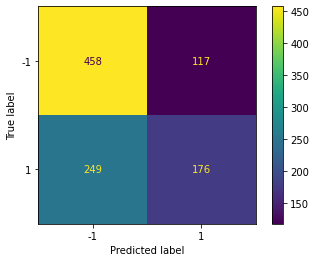

In [10]:
# Confusion matrix

yhat = final_model.predict(X_test)
cm = confusion_matrix(y_test, yhat, labels=final_model.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=final_model.classes_)
display.plot();

In [11]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

          -1       0.65      0.80      0.71       575
           1       0.60      0.41      0.49       425

    accuracy                           0.63      1000
   macro avg       0.62      0.61      0.60      1000
weighted avg       0.63      0.63      0.62      1000

